In [48]:
import pandas as pd
import numpy as np

In [49]:
stock_name = "FB"
training_data = pd.read_csv(stock_name + "/"+stock_name +"_training_set.csv",low_memory=False)

In [50]:
cols = training_data.columns

In [51]:
print cols

Index([u'Unnamed: 0', u'Date', u'Mod Score', u'Average Score', u'Stock Price',
       u'Change'],
      dtype='object')


In [52]:
x = training_data[cols[2:4]] #taking Date and Averagee sentiment
print x

    Mod Score  Average Score
0         1.0            1.0
1         1.0            2.0
2         1.0            1.0
3         1.0            1.0
4         1.0            1.0
5         1.0            2.0
6         1.0            1.0
7         1.0            2.0
8         1.0            2.0
9         1.0            1.0
10        1.0            3.0
11        1.0            2.0
12        2.0            3.0
13        1.0            3.0
14        1.0            1.0
15        1.0            1.0
16        1.0            2.0
17        2.0            3.0
18        1.0            2.0
19        2.0            3.0
20        1.0            1.0
21       -1.0            1.0
22        1.0            1.0
23        1.0            2.0
24        1.0            1.0
25        1.0            2.0
26        1.0            1.0
27        1.0            2.0
28        1.0           -2.0
29        1.0            2.0
30        1.0           -2.0


[[1.0], [2.0], [1.0], [1.0], [1.0], [2.0], [1.0], [2.0], [2.0], [1.0], [3.0], [2.0], [3.0], [3.0], [1.0], [1.0], [2.0], [3.0], [2.0], [3.0], [1.0], [1.0], [1.0], [2.0], [1.0], [2.0], [1.0], [2.0], [-2.0], [2.0], [-2.0]]


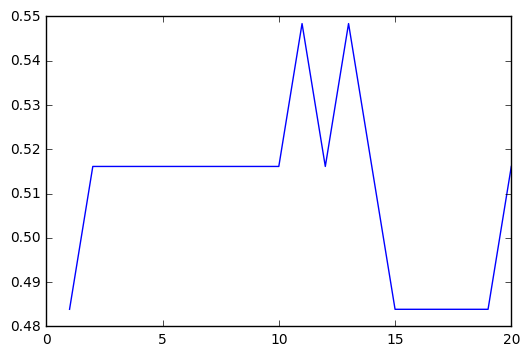

In [66]:
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
results = ["Decrease","Increase"]
X = []
temp = training_data['Average Score']
for entry in training_data['Average Score']:
    X.append([entry])
y = np.array(training_data['Change'])
print(X)
scores = []
ks = []
for i in xrange(1,21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    knn_predict = knn.predict(X)
    scores.append(metrics.accuracy_score(y,knn_predict))
    ks.append(i)
plt.plot(ks,scores)
plt.show()

In [67]:
logreg = LogisticRegression()
logreg.fit(X,y)
log_predict = logreg.predict(X)

In [68]:
print metrics.accuracy_score(y,log_predict)

0.516129032258


In [56]:
y = np.asarray(training_data[cols[len(cols)-1]].dropna(),dtype="|S6")#output
print y

['0.0' '1.0' '1.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0' '0.0' '1.0' '1.0' '1.0'
 '0.0' '0.0' '1.0' '1.0' '0.0' '1.0' '1.0']


In [57]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

In [58]:
#values,target = x[:-10],y[:-10]

In [59]:
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
#model = X.ix[len(X)-1]
#print model
svm_predict = clf.predict(X)
print metrics.accuracy_score(y,svm_predict)

0.516129032258


### 